## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [3]:
from utils import set_logging_level
from be_great import GReaT

In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)

### Load Data

In [6]:
data = datasets.load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
data.columns = ["sepal length", "sepal width", "petal length", "petal width", "target"]

### Create GReaT Model

In [8]:
great = GReaT("distilgpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=1000,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=500,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_iris", # Name of the directory where all intermediate steps are saved
              batch_size=16,                 # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
             )

### Start Training

In [9]:
trainer = great.fit(data)

2022-10-13 09:45:13,702 - INFO - Convert data into HuggingFace dataset object... (great.py:99)
2022-10-13 09:45:13,705 - INFO - Create GReaT Trainer... (great.py:104)
2022-10-13 09:45:15,746 - INFO - Start training... (great.py:113)
/home/kathrin/miniconda3/envs/transformers/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 150
  Num Epochs = 1000
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 10000
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by 

Step,Training Loss
500,0.568400
1000,0.444800
1500,0.414200
2000,0.385300
2500,0.356700
3000,0.338400
3500,0.324600
4000,0.314500
4500,0.308200
5000,0.303100


Saving model checkpoint to trainer_iris/checkpoint-2000
Configuration saved in trainer_iris/checkpoint-2000/config.json
Model weights saved in trainer_iris/checkpoint-2000/pytorch_model.bin
tokenizer config file saved in trainer_iris/checkpoint-2000/tokenizer_config.json
Special tokens file saved in trainer_iris/checkpoint-2000/special_tokens_map.json
Saving model checkpoint to trainer_iris/checkpoint-4000
Configuration saved in trainer_iris/checkpoint-4000/config.json
Model weights saved in trainer_iris/checkpoint-4000/pytorch_model.bin
tokenizer config file saved in trainer_iris/checkpoint-4000/tokenizer_config.json
Special tokens file saved in trainer_iris/checkpoint-4000/special_tokens_map.json
Saving model checkpoint to trainer_iris/checkpoint-6000
Configuration saved in trainer_iris/checkpoint-6000/config.json
Model weights saved in trainer_iris/checkpoint-6000/pytorch_model.bin
tokenizer config file saved in trainer_iris/checkpoint-6000/tokenizer_config.json
Special tokens file 

In [10]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 517.6539,
 'train_samples_per_second': 289.769,
 'train_steps_per_second': 19.318,
 'total_flos': 1339656192000000.0,
 'train_loss': 0.33248889617919924,
 'epoch': 1000.0,
 'step': 10000}

In [11]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

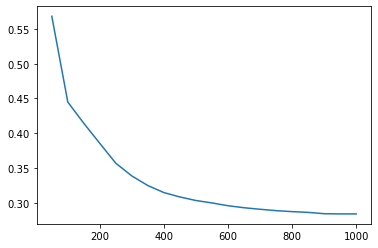

In [12]:
plt.plot(epochs, loss)

### Save Model

In [13]:
great.save("iris")

### Load Model

In [14]:
# great = GReaT.load_from_dir("iris")

### Generate Samples

In [15]:
n_samples = 150

In [18]:
samples = great.sample(n_samples, k=50)

100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 99.81it/s]


In [19]:
samples.head()

,sepal length,sepal width,petal length,petal width,target
0,5.6,2.8,4.0,1.1,1.0
1,7.3,2.9,6.3,1.8,2.0
2,5.8,2.7,3.9,1.2,1.0
3,5.7,2.5,5.0,2.0,2.0
4,6.7,3.0,5.0,1.7,1.0


In [20]:
samples.to_csv("iris_samples.csv")

We can also influence the distribution of the column on which the generation is conditioned (In the original dataset all three target values (0, 1, 2) have a probability of 33%).

In [21]:
samples_custom = great.sample(n_samples, k=50, start_col="target",
                              start_col_dist={"0": 0.5, "1": 0.5, "2": 0})

100%|█████████████████████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 98.16it/s]


In [22]:
samples_custom.head()

,sepal length,sepal width,petal length,petal width,target
0,5.2,3.4,1.5,0.2,0.0
1,4.8,3.0,1.4,0.2,0.0
2,6.6,3.0,4.4,1.4,1.0
3,6.4,2.9,4.3,1.3,1.0
4,5.8,4.0,1.2,0.2,0.0


## Plot Data

Original Data

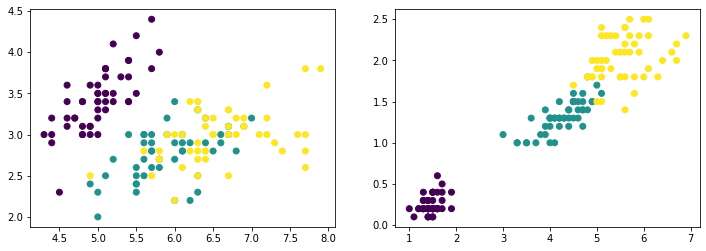

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(data["sepal length"], data["sepal width"], c=data["target"])
ax[1].scatter(data["petal length"], data["petal width"], c=data["target"])

Generated samples

In [24]:
samples = pd.read_csv("iris_samples.csv")

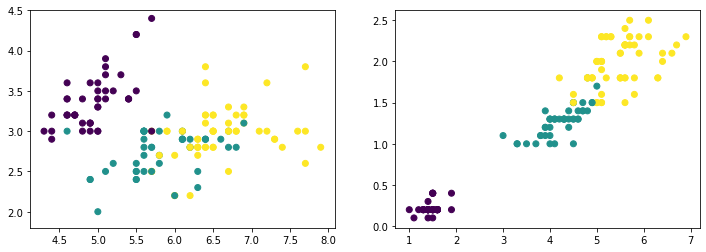

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["sepal length"], samples["sepal width"], c=samples["target"].astype("int"))
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["petal length"], samples["petal width"], c=samples["target"].astype("int"))